!pip install tensorflow opencv-python matplotlib

# 1. Install Dependencies and Setup

!pip list

In [71]:
import tensorflow as tf
import os

In [72]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [73]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [74]:
import cv2
import imghdr

In [59]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

import os

# Assuming 'data_dir' is the directory containing the image data
data_dir = 'data'

# Iterate over subdirectories in 'data_dir'
for image_class in os.listdir(data_dir):
    # Ignore '.DS_Store' file
    if image_class == '.DS_Store':
        continue
    
    # Construct the full path to the subdirectory
    class_dir = os.path.join(data_dir, image_class)
    
    # Iterate over files in the subdirectory
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        try:
            # Process the image
            print("Processing image:", image_path)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")


# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 3 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [61]:
batch = data_iterator.next()

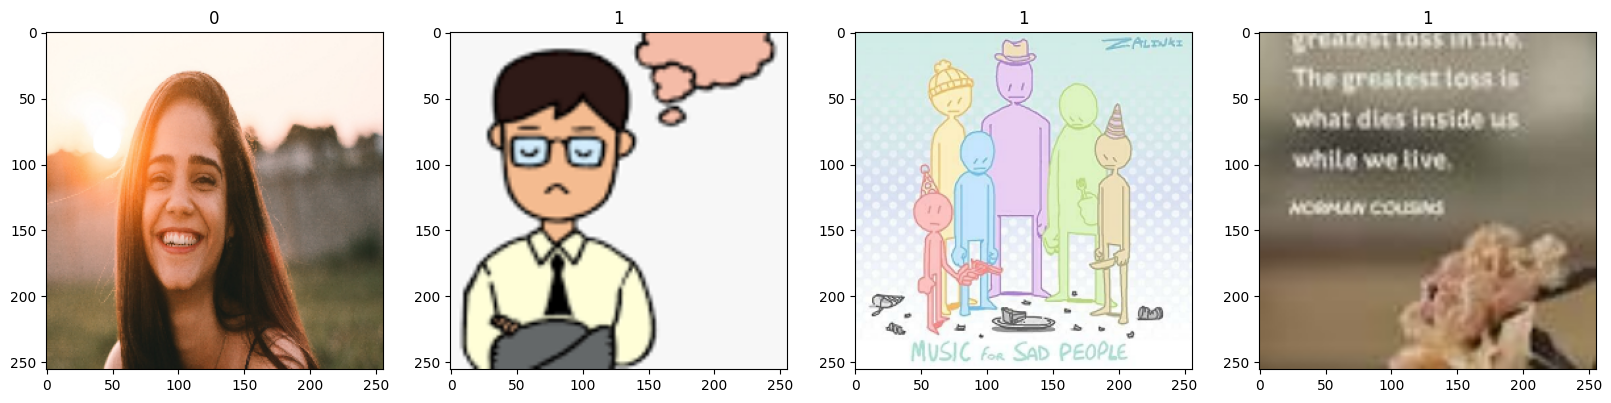

In [62]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

2024-03-13 14:38:03.162620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 60 of 256
2024-03-13 14:38:13.304417: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 118 of 256
2024-03-13 14:38:24.084755: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 14:38:24.678127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


(array([[[[8.96507382e-01, 9.63174045e-01, 7.90624976e-01],
          [9.02293980e-01, 9.68960643e-01, 7.96411633e-01],
          [8.99816155e-01, 9.74325955e-01, 7.97855377e-01],
          ...,
          [5.52271008e-01, 8.73839617e-01, 6.85604334e-01],
          [5.49352765e-01, 8.74843001e-01, 6.94450855e-01],
          [5.46763957e-01, 8.72254133e-01, 6.91861987e-01]],
 
         [[9.16149676e-01, 9.78894770e-01, 7.97713697e-01],
          [9.12316203e-01, 9.75061297e-01, 7.97648609e-01],
          [9.08712447e-01, 9.72866893e-01, 7.92941928e-01],
          ...,
          [5.51715672e-01, 8.73284340e-01, 6.85048997e-01],
          [5.52941203e-01, 8.74509811e-01, 6.86274529e-01],
          [5.45098066e-01, 8.74509811e-01, 6.82352960e-01]],
 
         [[9.33088243e-01, 9.87925112e-01, 7.95963526e-01],
          [9.28370118e-01, 9.82425690e-01, 7.92807877e-01],
          [9.27470148e-01, 9.82046545e-01, 7.90866256e-01],
          ...,
          [5.52941203e-01, 8.74509811e-01, 6.8504

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-03-13 14:46:52.563212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 14:47:04.186843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 14:47:18.902375: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 14:47:19.241342: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7222 - loss: 0.6053

2024-03-13 14:48:53.123801: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 14:49:06.993116: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 14:49:23.734198: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 14:49:24.291070: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 182s 19s/step - accuracy: 0.7212 - loss: 0.6050 - val_accuracy: 0.7969 - val_loss: 0.5632
Epoch 2/20


2024-03-13 14:49:50.374714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 61 of 256
2024-03-13 14:50:01.091387: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 14:50:11.216777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 224 of 256
2024-03-13 14:50:18.269015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.6949 - loss: 0.5795

2024-03-13 14:51:41.037823: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 40 of 256
2024-03-13 14:52:01.796687: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 14:52:15.606894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 174s 19s/step - accuracy: 0.6951 - loss: 0.5794 - val_accuracy: 0.8125 - val_loss: 0.4744
Epoch 3/20


2024-03-13 14:52:49.588603: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 14:53:04.554709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 118 of 256
2024-03-13 14:53:20.607101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7992 - loss: 0.4984

2024-03-13 14:54:40.183918: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 40 of 256
2024-03-13 14:55:01.511828: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 14:55:19.667343: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 186s 20s/step - accuracy: 0.8031 - loss: 0.4928 - val_accuracy: 0.8125 - val_loss: 0.4531
Epoch 4/20


2024-03-13 14:55:52.974659: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 14:56:04.874688: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 14:56:25.561935: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 14:56:26.411881: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8271 - loss: 0.4437

2024-03-13 14:58:01.743901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 14:58:16.473549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 154 of 256
2024-03-13 14:58:30.299404: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 14:58:30.580189: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 189s 19s/step - accuracy: 0.8292 - loss: 0.4365 - val_accuracy: 0.7656 - val_loss: 0.3957
Epoch 5/20


2024-03-13 14:58:58.247523: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 51 of 256
2024-03-13 14:59:08.449892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 61 of 256
2024-03-13 14:59:29.260522: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 14:59:50.040346: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 14:59:50.926508: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.8470 - loss: 0.3768 

2024-03-13 15:01:49.720872: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:02:03.551584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:02:22.844525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 236s 24s/step - accuracy: 0.8505 - loss: 0.3720 - val_accuracy: 0.7812 - val_loss: 0.3208
Epoch 6/20


2024-03-13 15:02:55.329950: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 40 of 256
2024-03-13 15:03:05.982266: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 77 of 256
2024-03-13 15:03:17.355104: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:03:33.482293: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8470 - loss: 0.3040

2024-03-13 15:04:58.902877: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 40 of 256
2024-03-13 15:05:23.405432: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:05:36.517259: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 224 of 256
2024-03-13 15:05:43.972844: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 202s 22s/step - accuracy: 0.8477 - loss: 0.3057 - val_accuracy: 0.8750 - val_loss: 0.2733
Epoch 7/20


2024-03-13 15:06:20.943037: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:06:37.135107: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 136 of 256
2024-03-13 15:06:48.499679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 224 of 256
2024-03-13 15:06:55.948578: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8544 - loss: 0.3139

2024-03-13 15:08:31.231591: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 40 of 256
2024-03-13 15:08:50.704418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:09:06.513802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:09:07.254920: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 203s 21s/step - accuracy: 0.8547 - loss: 0.3130 - val_accuracy: 0.8906 - val_loss: 0.2431
Epoch 8/20


2024-03-13 15:09:42.456966: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 40 of 256
2024-03-13 15:10:07.482360: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:10:20.675702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 231 of 256
2024-03-13 15:10:28.877579: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8570 - loss: 0.2921 

2024-03-13 15:12:11.080013: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:12:25.339364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:12:36.845990: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:12:37.067153: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 200s 19s/step - accuracy: 0.8598 - loss: 0.2886 - val_accuracy: 0.9844 - val_loss: 0.1551
Epoch 9/20


2024-03-13 15:13:00.396631: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 62 of 256
2024-03-13 15:13:19.409569: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9691 - loss: 0.1615

2024-03-13 15:14:15.311426: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:14:30.630622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:14:46.436921: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:14:46.848455: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 135s 15s/step - accuracy: 0.9680 - loss: 0.1622 - val_accuracy: 0.9375 - val_loss: 0.1522
Epoch 10/20


2024-03-13 15:15:18.171386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:15:35.935035: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 224 of 256
2024-03-13 15:15:41.879181: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9569 - loss: 0.1208

2024-03-13 15:17:03.435667: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 51 of 256
2024-03-13 15:17:13.813146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 77 of 256
2024-03-13 15:17:23.884501: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:17:41.395844: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 175s 19s/step - accuracy: 0.9567 - loss: 0.1213 - val_accuracy: 1.0000 - val_loss: 0.0527
Epoch 11/20


2024-03-13 15:18:39.328260: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:18:58.496533: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:18:58.714090: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9682 - loss: 0.0843

2024-03-13 15:19:56.557880: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:20:06.897346: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 141 of 256
2024-03-13 15:20:16.508062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 151s 13s/step - accuracy: 0.9677 - loss: 0.0840 - val_accuracy: 1.0000 - val_loss: 0.0536
Epoch 12/20


2024-03-13 15:20:40.568614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:21:01.056645: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:21:01.363383: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9814 - loss: 0.0754 

2024-03-13 15:22:29.632583: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:22:50.464532: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:22:50.591626: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 155s 17s/step - accuracy: 0.9815 - loss: 0.0747 - val_accuracy: 1.0000 - val_loss: 0.0327
Epoch 13/20


2024-03-13 15:23:15.729971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:23:36.009269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:23:36.464422: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9986 - loss: 0.0436

2024-03-13 15:24:34.653254: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:24:59.801784: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:25:00.713160: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 16s/step - accuracy: 0.9982 - loss: 0.0430 - val_accuracy: 0.9844 - val_loss: 0.0654
Epoch 14/20


2024-03-13 15:25:38.063240: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:25:55.389848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 157 of 256
2024-03-13 15:26:04.715139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9952 - loss: 0.0417

2024-03-13 15:27:13.000767: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:27:33.571637: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:27:33.690638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 141s 14s/step - accuracy: 0.9947 - loss: 0.0415 - val_accuracy: 0.9844 - val_loss: 0.0250
Epoch 15/20


2024-03-13 15:27:57.505953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:28:16.893315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 1.0000 - loss: 0.0154

2024-03-13 15:29:16.703992: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:29:36.252275: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:29:36.557411: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 123s 13s/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0156
Epoch 16/20


2024-03-13 15:30:19.460585: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:30:38.087673: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9943 - loss: 0.0172

2024-03-13 15:31:41.260888: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:31:51.357706: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:32:03.382357: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 147s 14s/step - accuracy: 0.9939 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 17/20


2024-03-13 15:32:26.575288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 61 of 256
2024-03-13 15:32:46.234814: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9986 - loss: 0.0102

2024-03-13 15:33:47.760844: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 40 of 256
2024-03-13 15:34:02.475285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:34:13.952744: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 131s 14s/step - accuracy: 0.9982 - loss: 0.0108 - val_accuracy: 0.9844 - val_loss: 0.0333
Epoch 18/20


2024-03-13 15:34:48.361656: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 61 of 256
2024-03-13 15:35:08.521023: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 255 of 256
2024-03-13 15:35:08.521075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9977 - loss: 0.0195

2024-03-13 15:36:08.322614: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:36:27.463872: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 133s 13s/step - accuracy: 0.9975 - loss: 0.0203 - val_accuracy: 1.0000 - val_loss: 0.0165
Epoch 19/20


2024-03-13 15:36:50.443926: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 62 of 256
2024-03-13 15:37:00.511569: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 154 of 256
2024-03-13 15:37:09.623405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.9951 - loss: 0.0164 

2024-03-13 15:38:52.545350: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:39:08.024089: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 141 of 256
2024-03-13 15:39:22.504014: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:39:23.273586: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 182s 23s/step - accuracy: 0.9952 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 0.0140
Epoch 20/20


2024-03-13 15:39:52.451029: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 60 of 256
2024-03-13 15:40:12.524325: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:40:13.231550: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9951 - loss: 0.0130

2024-03-13 15:41:14.649188: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 52 of 256
2024-03-13 15:41:25.128971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 112 of 256
2024-03-13 15:41:37.093151: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:4: Filling up shuffle buffer (this may take a while): 248 of 256
2024-03-13 15:41:37.547122: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 129s 14s/step - accuracy: 0.9952 - loss: 0.0129 - val_accuracy: 0.9844 - val_loss: 0.0556


# 8. Plot Performance

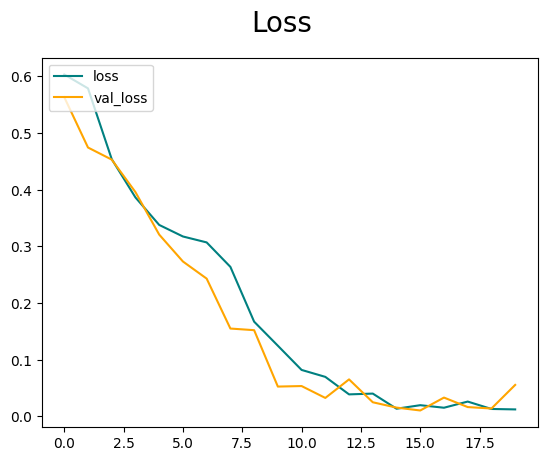

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

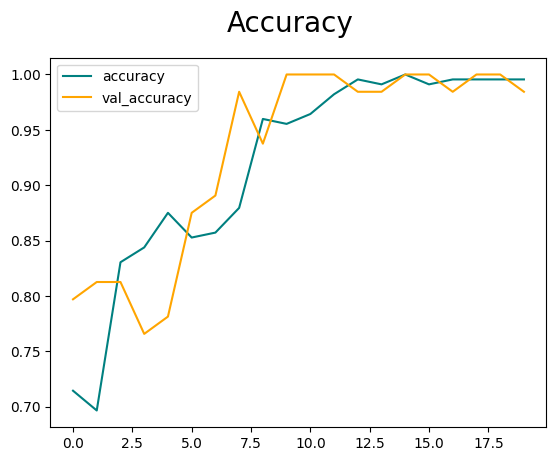

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [64]:
import cv2

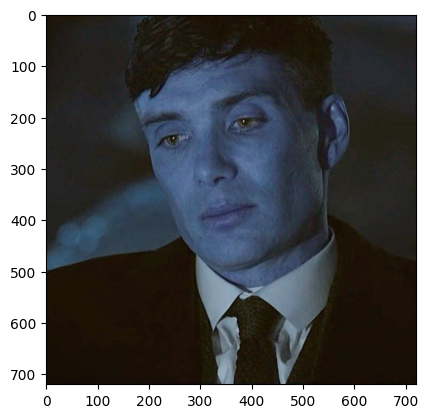

In [65]:
img = cv2.imread('PHOTO-2024-03-13-15-51-17.jpg')
plt.imshow(img)
plt.show()

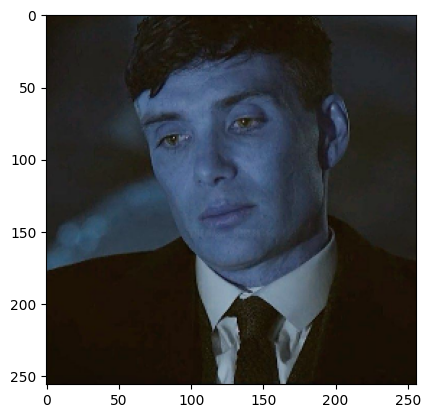

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


In [68]:
yhat

array([[0.9234149]], dtype=float32)

In [69]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [75]:
from tensorflow.keras.models import load_model

In [76]:
model.save(os.path.join('models','imageclassifier.h5'))

In [77]:
new_model = load_model('imageclassifier.h5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'imageclassifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))